<a href="https://colab.research.google.com/github/Rafaelpecan/Titanic_ML/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler 
import keras
from keras.models import Sequential, Model,load_model
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.applications.vgg16 import VGG16
import numpy as np
from IPython.display import Image
from keras.layers.core import Flatten, Dense, Dropout
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.layers.core import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.constraints import maxnorm
from sklearn.metrics import accuracy_score

In [ ]:
!ls

sample_data  test.csv  train.csv


In [ ]:
train_data = pd.read_csv("train.csv", encoding = 'utf8')
test_data = pd.read_csv("test.csv", encoding = 'utf8')

test_data.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


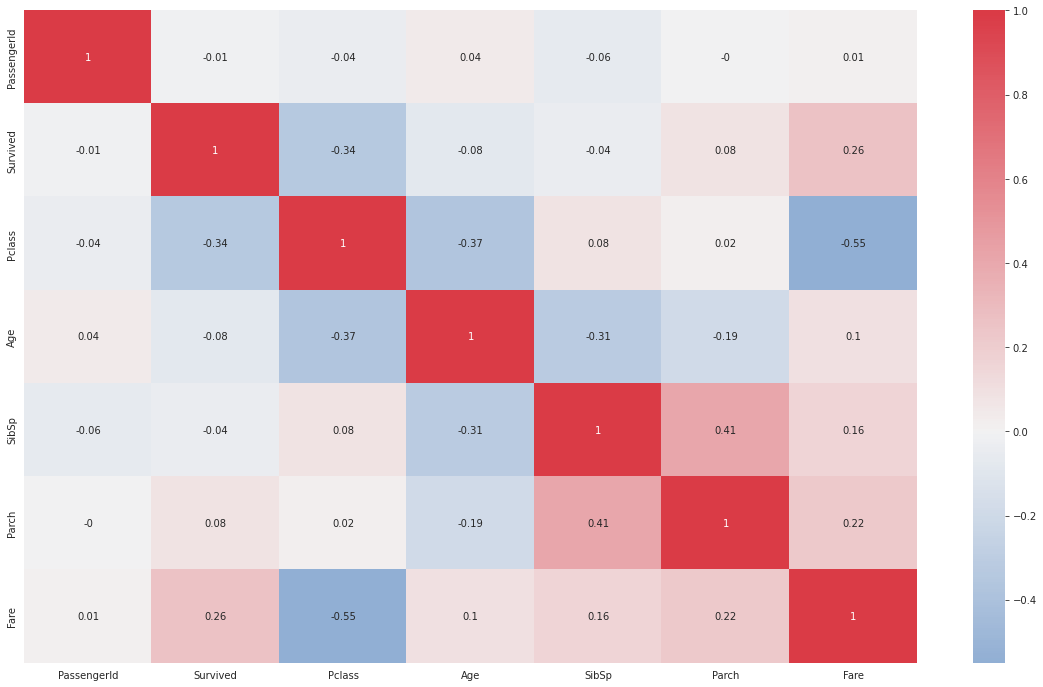

In [ ]:
# Analise de correlacao entre os atributos
cor_matrix = train_data.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(20,12));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

In [ ]:
train_data = train_data.drop('PassengerId', axis = 1)
train_data = train_data.drop('Ticket', axis = 1)
train_data = train_data.drop('Cabin', axis = 1)
train_data = train_data.drop('Name', axis = 1)

test_data = test_data.drop('PassengerId', axis = 1)
test_data = test_data.drop('Ticket', axis = 1)
test_data = test_data.drop('Cabin', axis = 1)
test_data = test_data.drop('Name', axis = 1)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


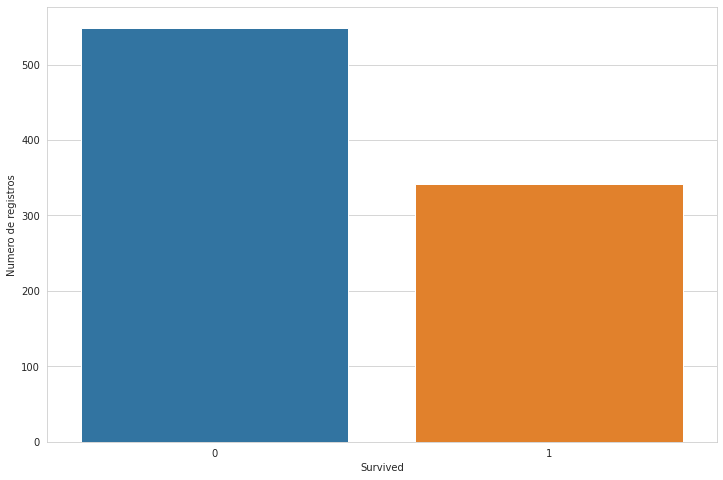

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
#Analise da variavel de saida
sns.set_style("whitegrid")
sns.countplot(train_data['Survived'])
plt.xlabel('Survived')
plt.ylabel('Numero de registros')
plt.show()

In [ ]:
df = train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

df.head()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
df = train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

df.head()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


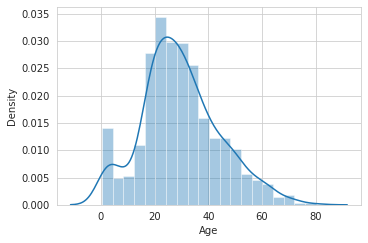

In [ ]:
sns.distplot(train_data['Age'].dropna(), ax=plt.subplot(221))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


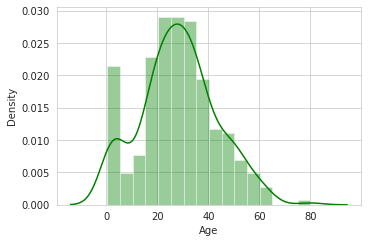

In [ ]:
# Distribuicao por vivos, mortos e entanasia
# vivos hist
sns.distplot(train_data.loc[train_data['Survived']==1, 'Age'].dropna(),color='green', label='Vivo', ax=plt.subplot(222))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


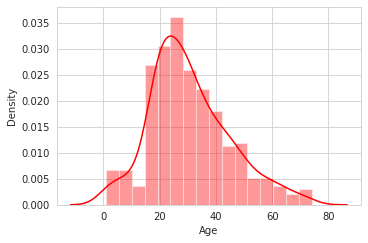

In [ ]:
# mortos hist
sns.distplot(train_data.loc[train_data['Survived']==0, 'Age'].dropna(),color='red', label='Morto', ax=plt.subplot(222))

In [ ]:
train_data['Sex'] = train_data['Sex'].map({'male': 1,'female': 0})
test_data['Sex'] = test_data['Sex'].map({'male': 1,'female': 0})

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
train_data['Fare'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [ ]:
train_data['Age'].fillna(train_data['Age'].dropna().median(), inplace=True)

test_data['Fare'].fillna(train_data['Fare'].dropna().median(), inplace=True)
test_data['Age'].fillna(train_data['Age'].dropna().median(), inplace=True)

In [ ]:
#OneHotencoding
train_data  = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data  = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

In [ ]:
test_data.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1


In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


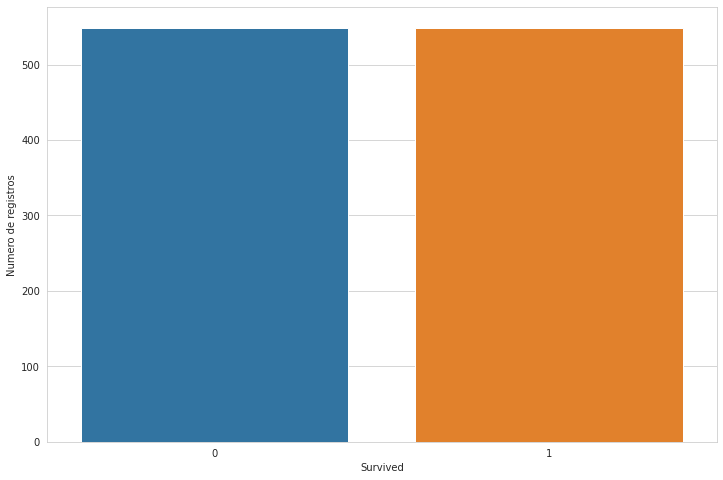

In [ ]:
#usando smote para balancear a base:
oversample = SMOTE()
X,Y = oversample.fit_resample(train_data.drop('Survived', axis=1), train_data['Survived'])

colunas = train_data.drop('Survived', axis=1).columns.tolist()

train_data = pd.DataFrame(X, columns = colunas)
train_data['Survived'] = Y

sns.countplot(train_data['Survived'])
plt.xlabel('Survived')
plt.ylabel('Numero de registros')
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(train_data.drop(['Survived'], axis = 1))

MinMaxScaler()

In [ ]:
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


In [ ]:
train_data[columns] = scaler.transform(train_data.drop(['Survived'], axis =1))
test_data[test_data.columns] = scaler.transform(test_data)


In [ ]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Survived
0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,1.0,0
1,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,1
2,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,1.0,1
3,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,1.0,1
4,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0


In [ ]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data
X_train.shape, Y_train.shape, X_test.shape

((1098, 8), (1098,), (418, 8))

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_train)
prob = logreg.predict_proba(X_test)
acc = accuracy_score(Y_train, Y_pred) * 100
acc

81.4207650273224

In [ ]:
# criando a Rede

model = Sequential()
model.add(Dense(12, input_shape=(8,), activation="softmax"))
model.add(Dense(4, activation="softmax"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='adam', loss="binary_crossentropy",metrics=["accuracy"])
H = model.fit(X_train, Y_train, batch_size=15, epochs=200, verbose=2)

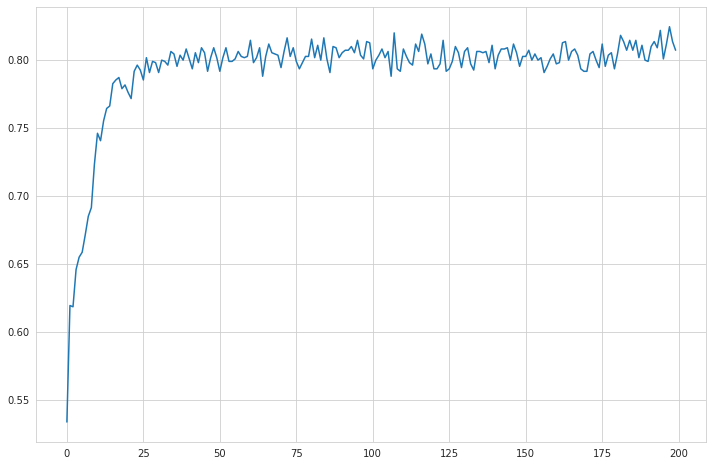

In [ ]:
plt.plot(H.history['accuracy'])